[20220817]

# 2. Model 1

Auto arima

## Goal
Find patterns on the features for target

## Plan
Checklist what will be done on the notebook :

        [ ] Get Data
        [ ] Modelling
                [ ] Hyper Parameter Tuning
                [ ] Feature selection (could be done with different notebook)
        [ ] Evaluation
        
## source

* https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd
* https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html

In [1]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import pmdarima
import joblib
sys.path.insert(1,'../../src/')

## import myfunc inside src folder
import myfunc 
from ramal import eval_model

In [2]:
with open("../../config.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

PATH_RAW = config['path']['raw']
PATH_INTERIM = config['path']['interim']
PATH_PROCESSED = config['path']['processed']
# PATH_MODEL = config['path']['artifact']+os.getcwd().split('\\')[-1]+'/'
PATH_MODEL = config['path']['artifact']+'iteration_0'+'/'
PATH_UDF = config['path']['udf']

## Get Data

In [3]:
# df = pd.read_csv(PATH_INTERIM + 'daily-min-temp3_iter0.csv')
# df.set_index('Date',inplace=True)

In [4]:
# ! pip install pmdarima

In [5]:
ts2 = joblib.load(PATH_MODEL+'ramal_1.pkl')

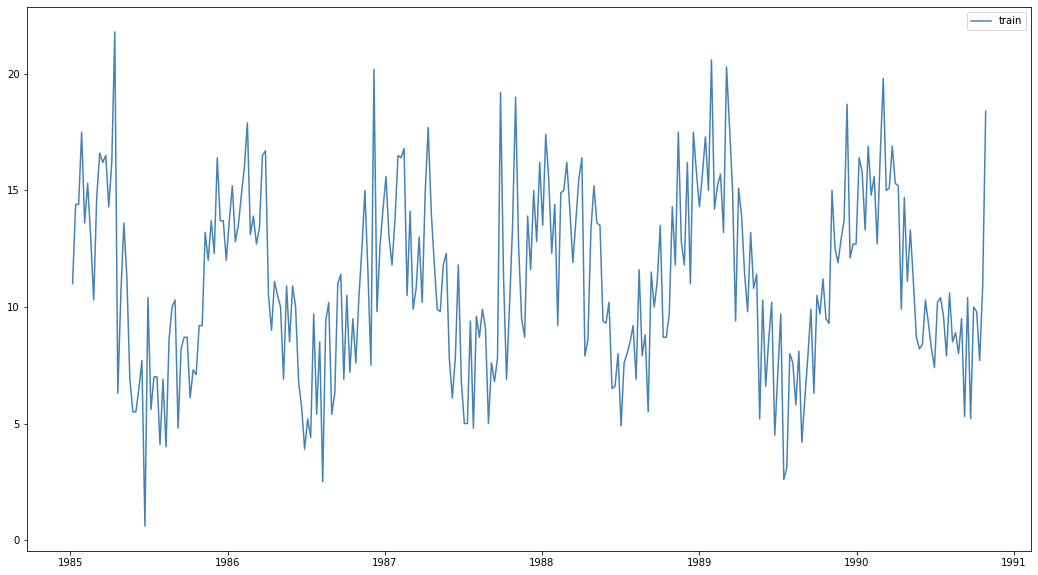

In [6]:
ts2.plot()

## Model 1

In [7]:
arima_model1 = pmdarima.arima.auto_arima(ts2.data, d = 0, max_d = 2
                         ,start_p = 1, max_p = 5
                         ,start_q = 1, max_q = 5
                         ,D = 1, max_D = 3
                         ,start_P = 0, max_P = 2
                         ,start_Q = 0, max_Q = 2
                         ,m = 27
                         ,seasonal = True
                         ,startionary = True
                         ,stepwise = False
                         ,trace = True
                         ,n_jobs = 5
                         ,random = True
                         ,n_fits = 30)


/usr/local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)



Best model:  ARIMA(1,0,1)(1,1,0)[27] intercept
Total fit time: 92.551 seconds


In [8]:
arima_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  304
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 27)   Log Likelihood                -733.756
Date:                             Sat, 20 Aug 2022   AIC                           1477.512
Time:                                     01:53:18   BIC                           1495.632
Sample:                                          0   HQIC                          1484.783
                                             - 304                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0044      0.067      0.065      0.948      -0.127       0.136
ar.L1          0.9132      0.047     19.451      0.000       0.821       1.005
ma.L1         -0.6758      0.079     -8.554      0.000      -0.831      -0.521
ar.S.L27      -0.6599      0.048    -13.763      0.000      -0.754      -0.566
sigma2        11.0560      0.982     11.255      0.000       9.131      12.981
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 0.28
Prob(Q):                              0.64   Prob(JB):                         0.87
Heteroskedasticity (H):               0.83   Skew:                             0.02
Prob(H) (two-sided):                  0.37   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Eval

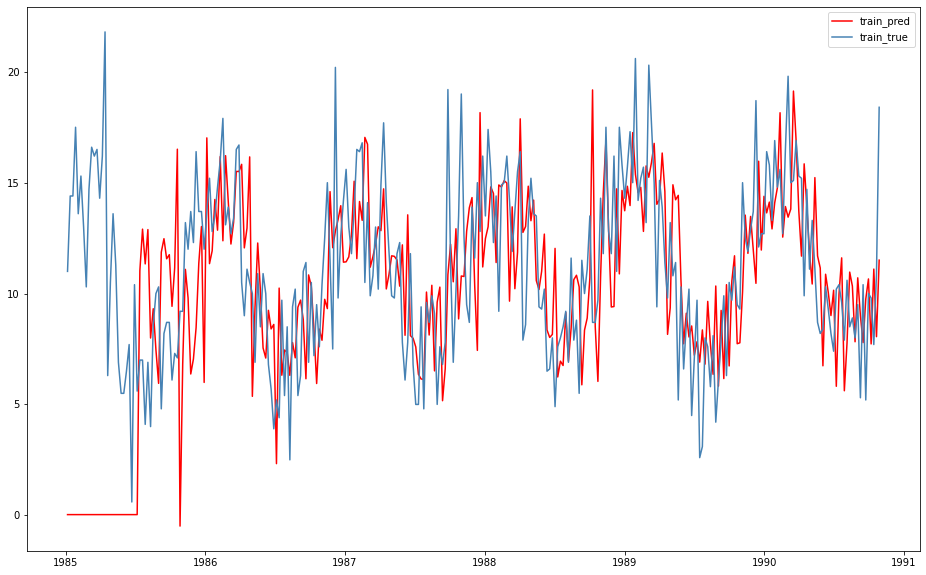

In [9]:
df_data_train = ts2.data
df_train_pred = pd.Series(arima_model1.predict_in_sample(), index = df_data_train.index)

## in sample
plt.figure(figsize=(16,10))
plt.plot(df_train_pred, label='train_pred', color='red')
plt.plot(ts2.data, label='train_true', color='steelblue')
plt.legend()

In [10]:
eval_model(ts2.data_1d(), df_train_pred)

{'MAE': 3.599782012544924,
 'MAPE': 0.3704253179750932,
 'MSE': 25.22397462724117,
 'over_est_0': 0.45394736842105265,
 'under_est_0': 0.5460526315789473,
 'R2': -0.6936545032248398}

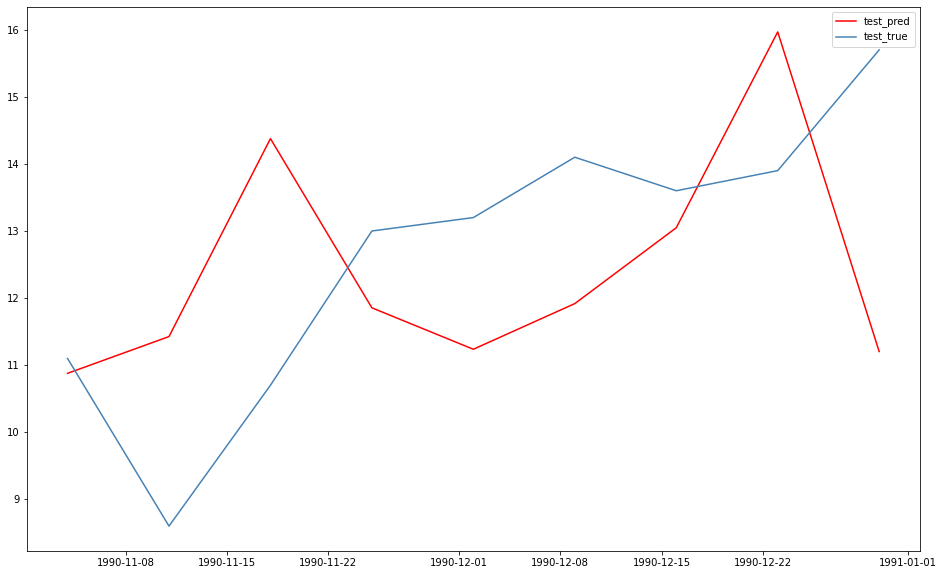

In [12]:
n_test = 50

df_data_test = ts2.data_test[:n_test]
df_test_pred = pd.Series(arima_model1.predict(n_periods=len(df_data_test)), index = df_data_test.index)

## in sample
plt.figure(figsize=(16,10))
plt.plot(df_test_pred, label='test_pred', color='red')
plt.plot(df_data_test,label='test_true', color='steelblue')
plt.legend()

In [13]:
eval_model(ts2.data_1d(test = 1)[:n_test], df_test_pred)

{'MAE': 2.126017803697204,
 'MAPE': 0.1733054487237799,
 'MSE': 6.2549663652116285,
 'over_est_0': 0.3333333333333333,
 'under_est_0': 0.6666666666666666,
 'R2': -0.5255096819888652}

 ARIMA(1,0,0)(2,1,1)[27] intercept   : AIC=inf, Time=34.96 sec
 ARIMA(0,0,1)(1,1,0)[27] intercept   : AIC=1504.084, Time=3.84 sec
 ARIMA(0,0,3)(1,1,1)[27] intercept   : AIC=1501.057, Time=10.88 sec
 ARIMA(0,0,0)(0,1,1)[27] intercept   : AIC=inf, Time=6.63 sec
 ARIMA(0,0,0)(0,1,0)[27] intercept   : AIC=1851.046, Time=0.08 sec
 ARIMA(0,0,3)(1,1,0)[27] intercept   : AIC=1500.166, Time=6.46 sec
 ARIMA(3,0,1)(0,1,0)[27] intercept   : AIC=1587.994, Time=1.39 sec
 ARIMA(3,0,1)(1,1,0)[27] intercept   : AIC=1480.924, Time=8.17 sec
 ARIMA(1,0,0)(0,1,2)[27] intercept   : AIC=inf, Time=24.72 sec
 ARIMA(3,0,1)(0,1,1)[27] intercept   : AIC=inf, Time=18.78 sec
 ARIMA(2,0,1)(0,1,1)[27] intercept   : AIC=inf, Time=17.94 sec
 ARIMA(0,0,0)(1,1,0)[27] intercept   : AIC=inf, Time=2.83 sec
 ARIMA(0,0,1)(1,1,2)[27] intercept   : AIC=inf, Time=29.91 sec
 ARIMA(1,0,1)(0,1,0)[27] intercept   : AIC=1585.767, Time=0.36 sec
 ARIMA(0,0,2)(0,1,1)[27] intercept   : AIC=inf, Time=16.83 sec
 ARIMA(1,0,1)(1,1,0)[27] int